# Erwin Antepuesto
## Instructions: 
### Logistic Regression Project Exercise 

### Data

>This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

>Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [3]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [4]:
# All presence values 1,2,3,4 should only be represented by 1
df['num'] = df['num'].replace({2: 1, 3: 1, 4: 1})

# Convert to ordinal encoding by intensity, scrapped since results remain the same
# df['cp'] = df['cp'].replace({1: 3, 3: 1, 4: 0})
# df['slope'] = df['slope'].replace({1: 0, 2: 1, 3: 2})

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
(df.isna().sum()/len(df))*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64

In [8]:
df = df.dropna()
(df.isna().sum()/len(df))*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


<Axes: xlabel='num', ylabel='age'>

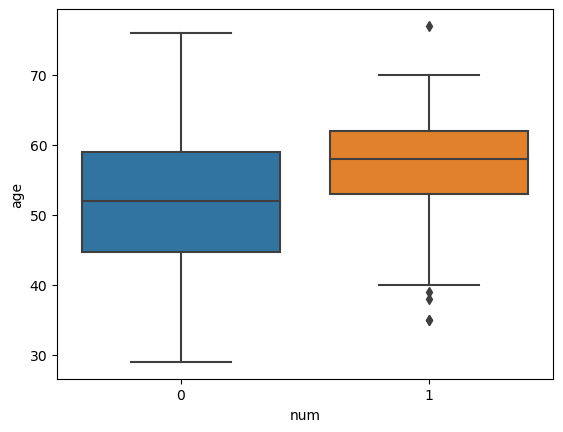

In [10]:
sns.boxplot(x='num',y='age',data=df)

>The probability of developing heart disease might become more varied as people age, particularly if there's a greater range of health outcomes in older adults. In the elderly population, there could be a larger mix of both healthy individuals and those suffering from heart disease, unlike in younger age groups. An increase in the median age of heart disease incidence would suggest a rising prevalence of the condition among older individuals, likely due to the accumulation of risk factors over time.

<Axes: xlabel='num', ylabel='thal'>

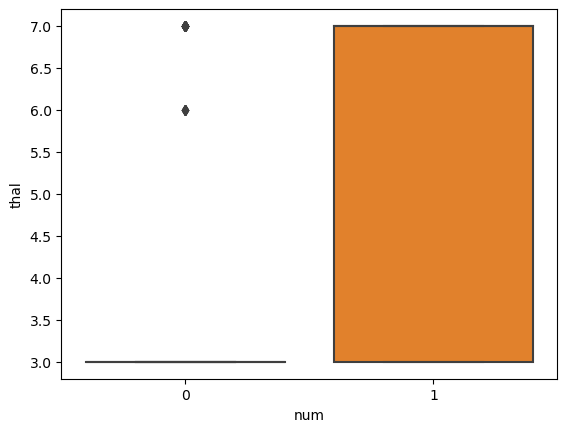

In [11]:
sns.boxplot(x='num',y='thal',data=df)

>The median thalassemia (thal) value is slightly higher in people with heart disease compared to those without it. Additionally, individuals with heart disease exhibit a broader range of thal values than those who do not have heart disease.

<Axes: xlabel='age', ylabel='ca'>

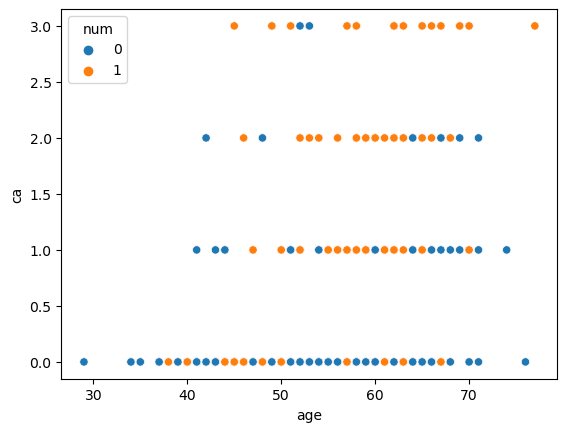

In [12]:
sns.scatterplot(x='age', y='ca', data=df, hue='num')

>The graph suggests a potential positive correlation between the number of major vessels highlighted by fluoroscopy and the presence of heart disease. Data points representing individuals without heart disease are clustered on the left side of the y-axis, indicating fewer major vessels highlighted by fluoroscopy. Conversely, data points for those with heart disease are more dispersed and tend to be on the right side of the y-axis, implying a greater number of major vessels highlighted. While the graph does not offer a definitive conclusion, it implies that a higher number of major vessels highlighted by fluoroscopy might be a risk factor for heart disease.

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<Axes: xlabel='num', ylabel='count'>

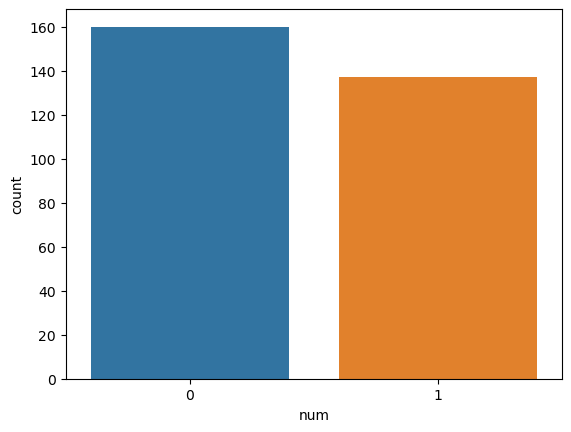

In [13]:
sns.countplot(data=df,x='num')

>The counts for value 0 (absence of heart disease) has a greater value than the counts of value 1 (presence of heart disease).

**TASK: Create a pairplot that displays the relationships between the following columns:**

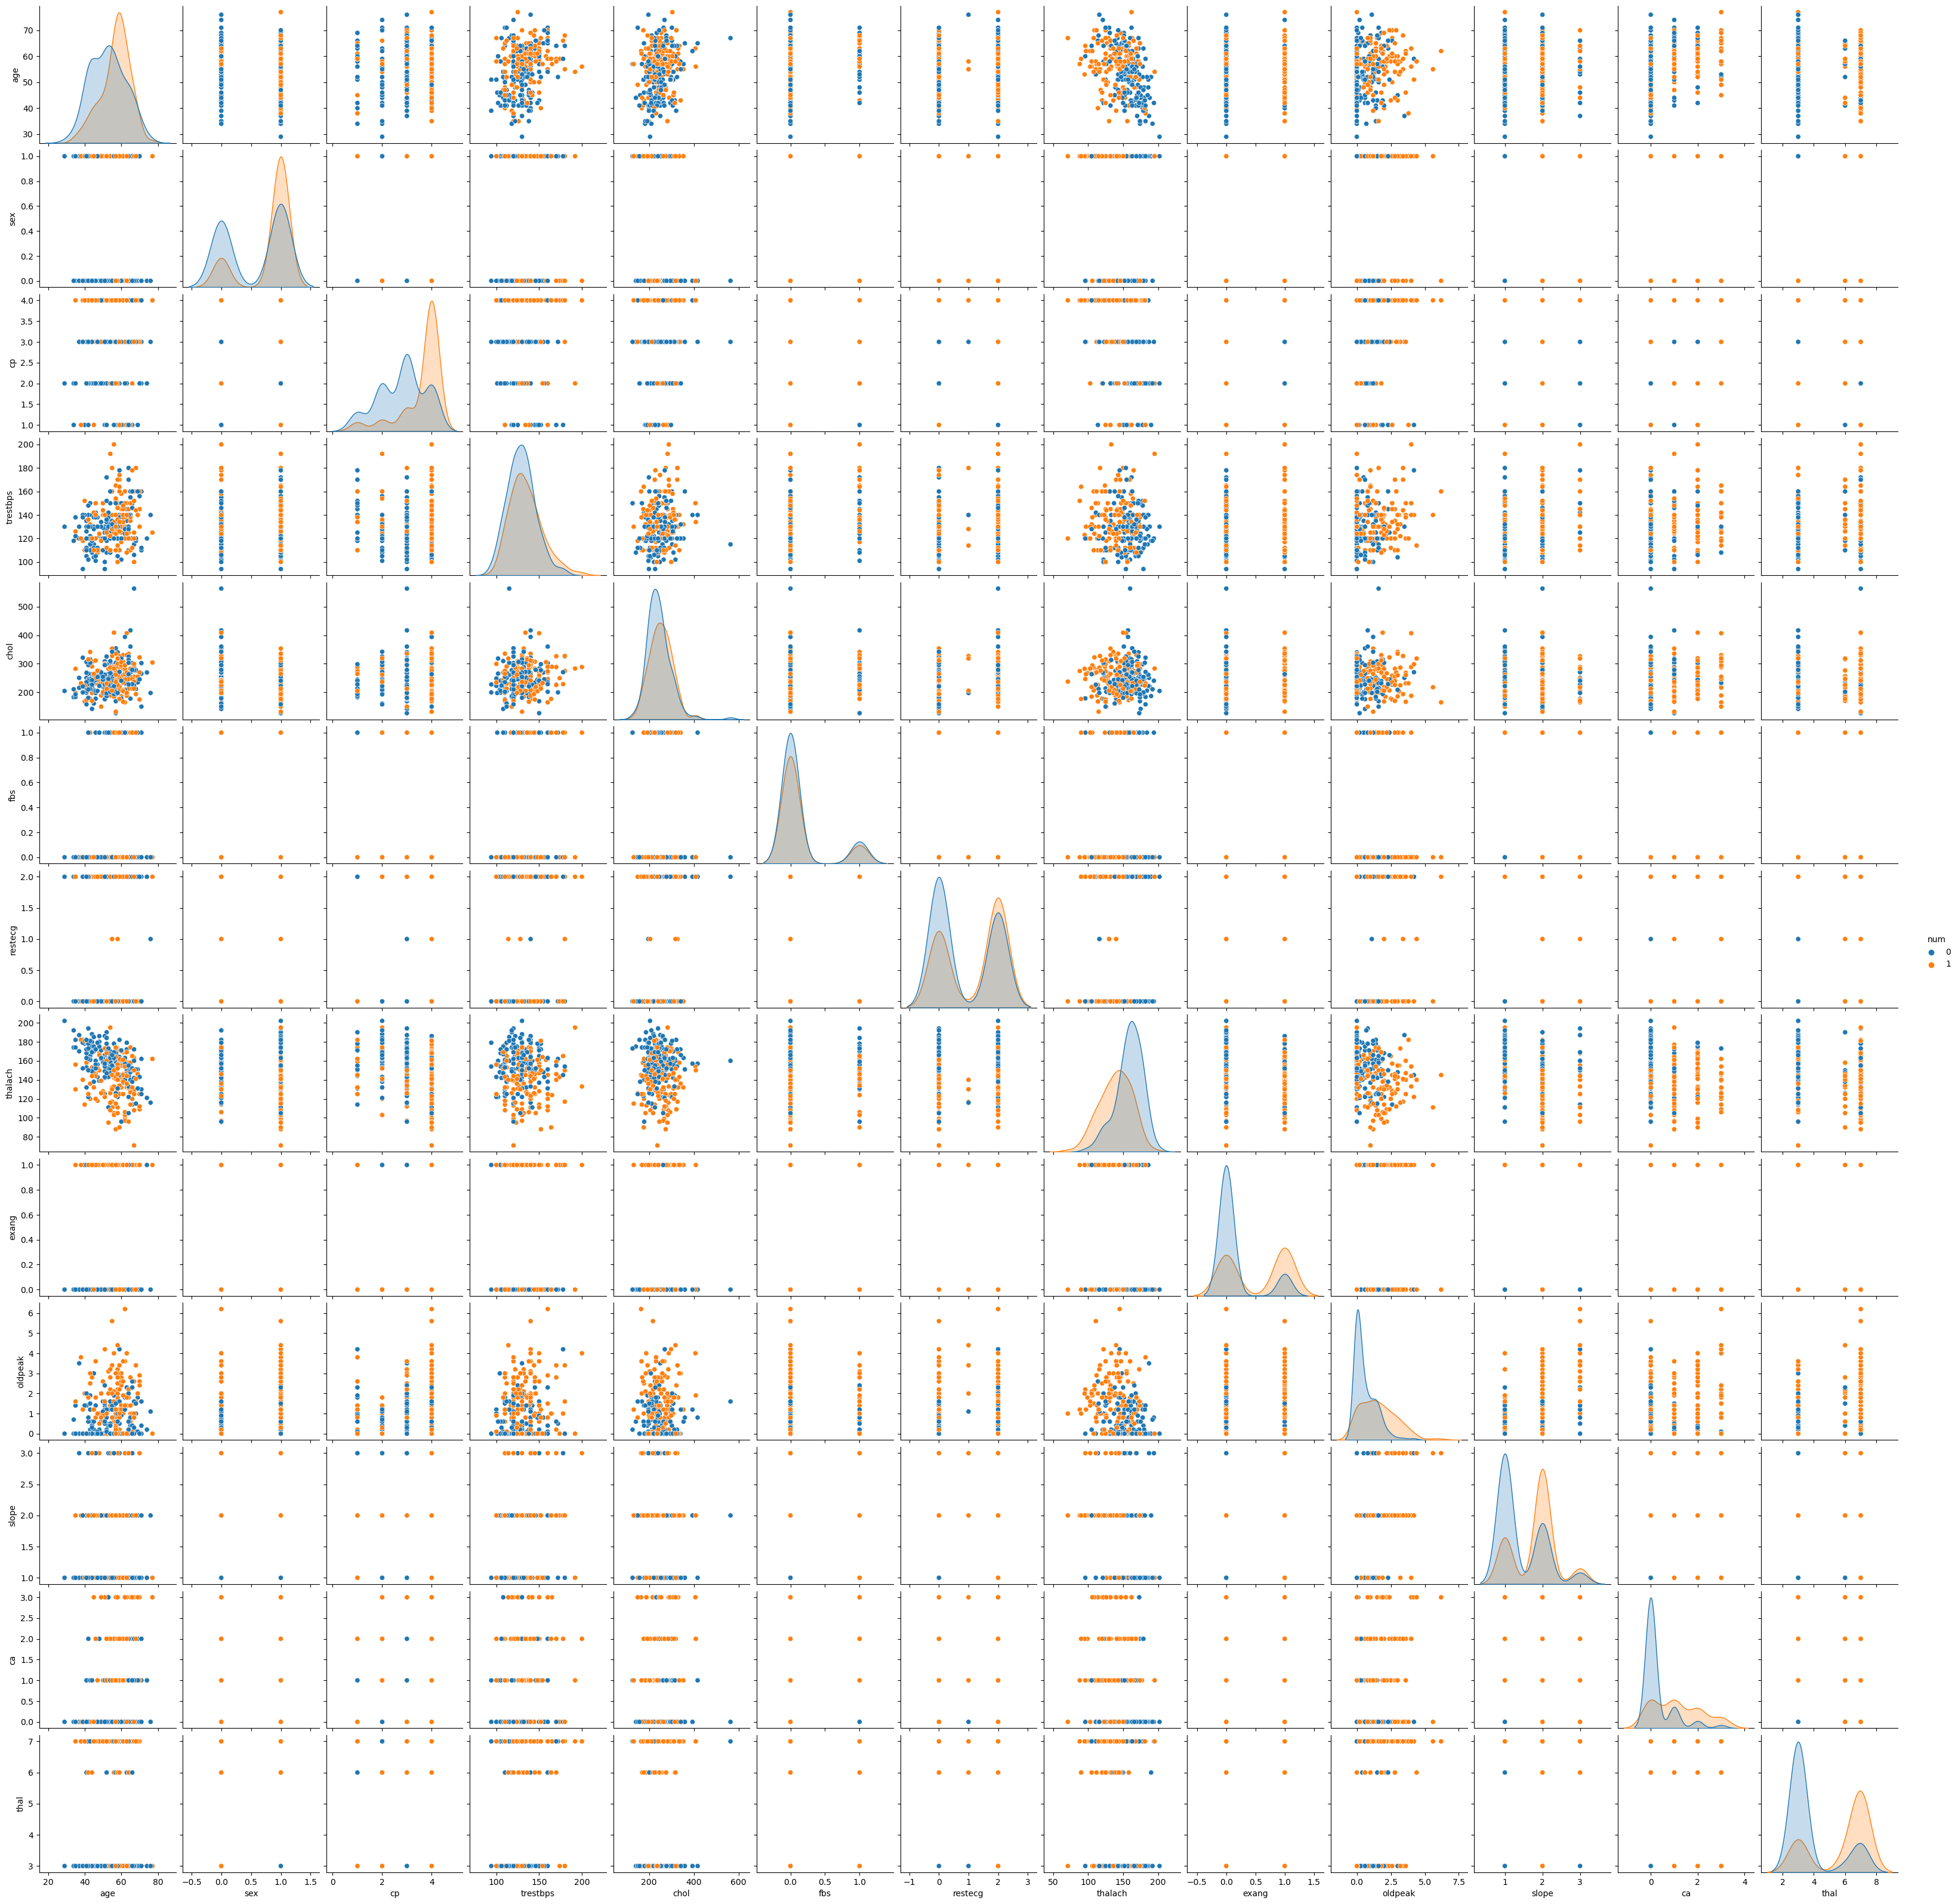

In [14]:
sns.pairplot(df, hue='num')

>The pairplot suggests that maximum heart rate and resting blood pressure have a weak positive correlation with age. It shows no apparent correlation between thalassemia (thal) and either serum cholesterol or maximum heart rate (thalach). Additionally, there is no clear relationship between thal and resting blood pressure (trestbps).

**TASK: Create a heatmap that displays the correlation between all the columns.**

<Axes: >

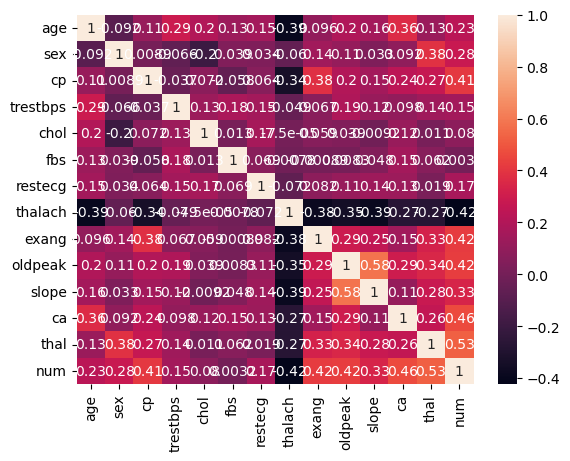

In [15]:
sns.heatmap(df.corr(), annot=True)

>The heatmap reveals several observations, including a weak positive correlation between age and both resting blood pressure (trestbps) and maximum heart rate (thalach). Additionally, there is a weak positive correlation between resting blood pressure (trestbps) and serum cholesterol (chol). A weak negative correlation is observed between the slope of the peak exercise ST segment (slope) and maximum heart rate (thalach). Moreover, there is a weak positive correlation between the number of major vessels (ca) and the presence of heart disease (num). It's important to remember that correlation does not imply causation.

# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [16]:
X = df.drop('num',axis=1)
y = df['num']

**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [19]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coeffecients

**TASK: Report back the model's coefficients.**

In [23]:
coef = list(log_model.coef_[0])
coef

[-0.06142851521531778,
 0.5520103451549089,
 0.6448046257312521,
 0.5095645142091407,
 0.23508497157120606,
 -0.3267188362072141,
 0.24148111857106402,
 -0.5426596474976725,
 0.3700783374589156,
 0.2817575179549758,
 0.2801300085131063,
 1.0382491051282878,
 0.6482270983673648]

In [24]:
names = list(df.columns)
names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [25]:
OR = {}
for key in names:
    for value in coef:
        OR[key] = value
        coef.remove(value)
        break
OR

{'age': -0.06142851521531778,
 'sex': 0.5520103451549089,
 'cp': 0.6448046257312521,
 'trestbps': 0.5095645142091407,
 'chol': 0.23508497157120606,
 'fbs': -0.3267188362072141,
 'restecg': 0.24148111857106402,
 'thalach': -0.5426596474976725,
 'exang': 0.3700783374589156,
 'oldpeak': 0.2817575179549758,
 'slope': 0.2801300085131063,
 'ca': 1.0382491051282878,
 'thal': 0.6482270983673648}

The coefficients mean:
- We can expect the **odds** of heart disease to **increase** per unit increase of sex.
- We can expect the **odds** of heart disease to **increase** per unit increase of chest pain (cp).
- We can expect the **odds** of heart disease to **increase** per unit increase of resting blood pressure (trestbps).
- We can expect the **odds** of heart disease to **increase** per unit increase of serum cholestoral (chol).
- We can expect the **odds** of heart disease to **increase** per unit increase of resting electrocardiographic results (restecg).
- We can expect the **odds** of heart disease to **increase** per unit increase of exercise induced angina (exang).
- We can expect the **odds** of heart disease to **increase** per unit increase of ST depression induced by exercise relative to rest (oldpeak).
- We can expect the **odds** of heart disease to **increase** per unit increase of the slope of the peak exercise ST segment (slope).
- We can expect the **odds** of heart disease to **increase** per unit increase of the number of major vessels (0-3) colored by flourosopy (ca).
- We can expect the **odds** of heart disease to **increase** per unit increase of thal.

Conversely:
- We can expect the **odds** of heart disease to **decrease** per unit increase of age.
- We can expect the **odds** of heart disease to **decrease** per unit increase of fasting blood sugar (fbs).
- We can expect the **odds** of heart disease to **decrease** per unit increase of maximum heart rate achieved (thalach).

**Task: Create a visualization of the coefficients.**

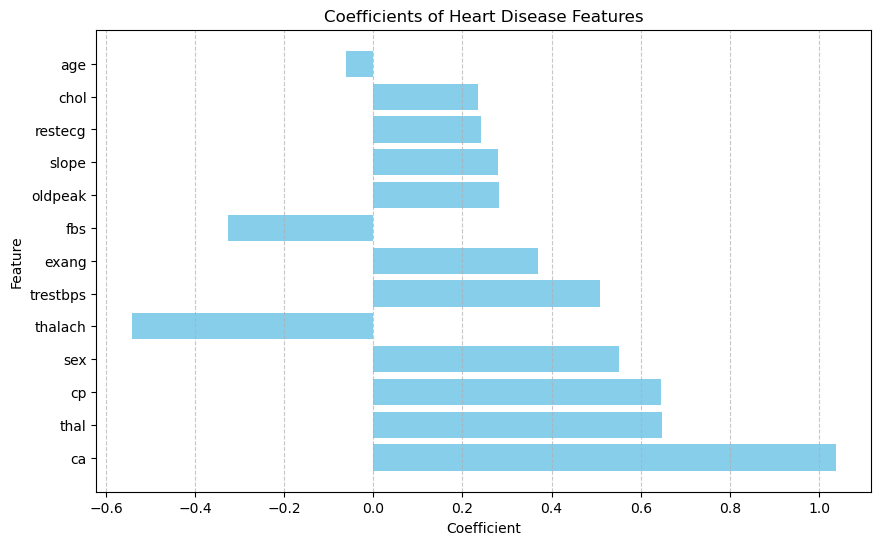

In [26]:
sorted_OR = {k: v for k, v in sorted(OR.items(), key=lambda item: abs(item[1]), reverse=True)}

plt.figure(figsize=(10, 6))
plt.barh(list(sorted_OR.keys()), list(sorted_OR.values()), color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients of Heart Disease Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

>When comparing the absolute values, it is clear that **ca** (the number of major vessels colored by fluoroscopy) has the highest absolute coefficient value of approximately 1.039. This indicates that **ca** is the strongest predictor among the variables listed.

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.7333333333333333

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [30]:
confusion_matrix(y_test,y_pred)

array([[7, 1],
       [3, 4]], dtype=int64)

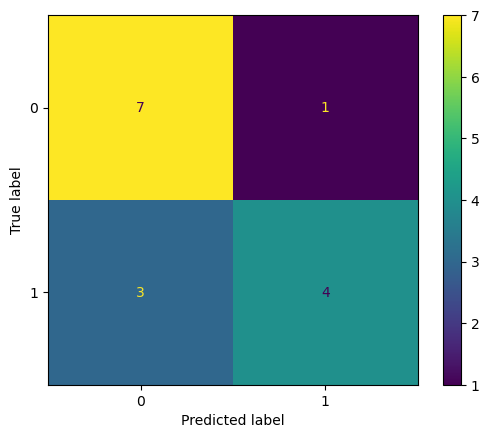

In [31]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

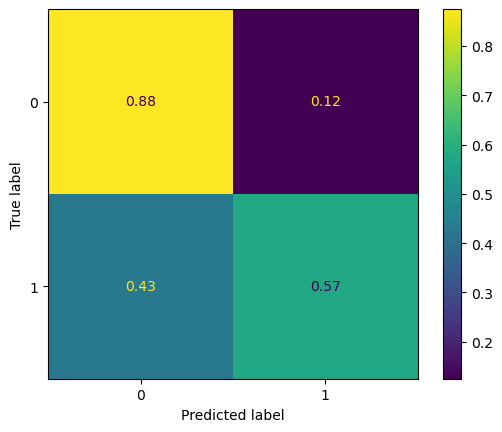

In [32]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [34]:
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay

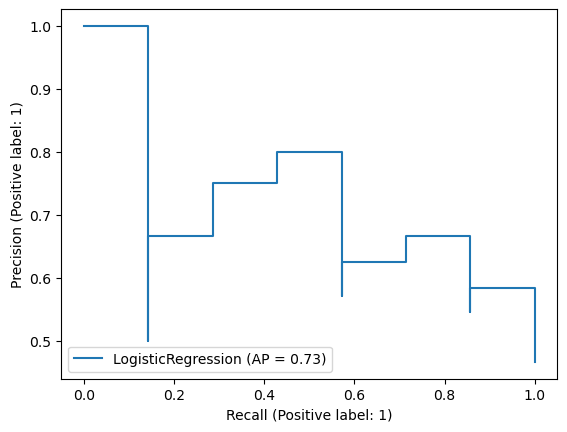

In [35]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

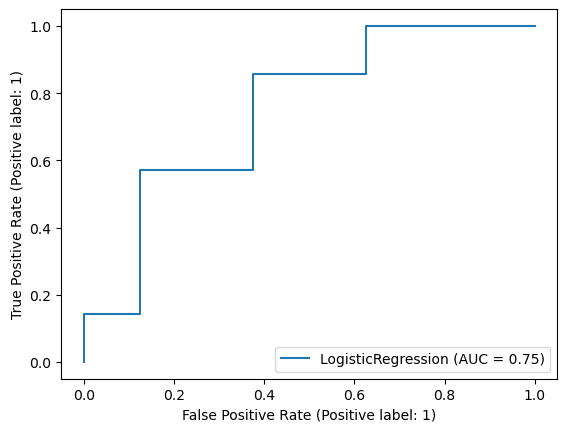

In [36]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)